In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(720, 960, 3)


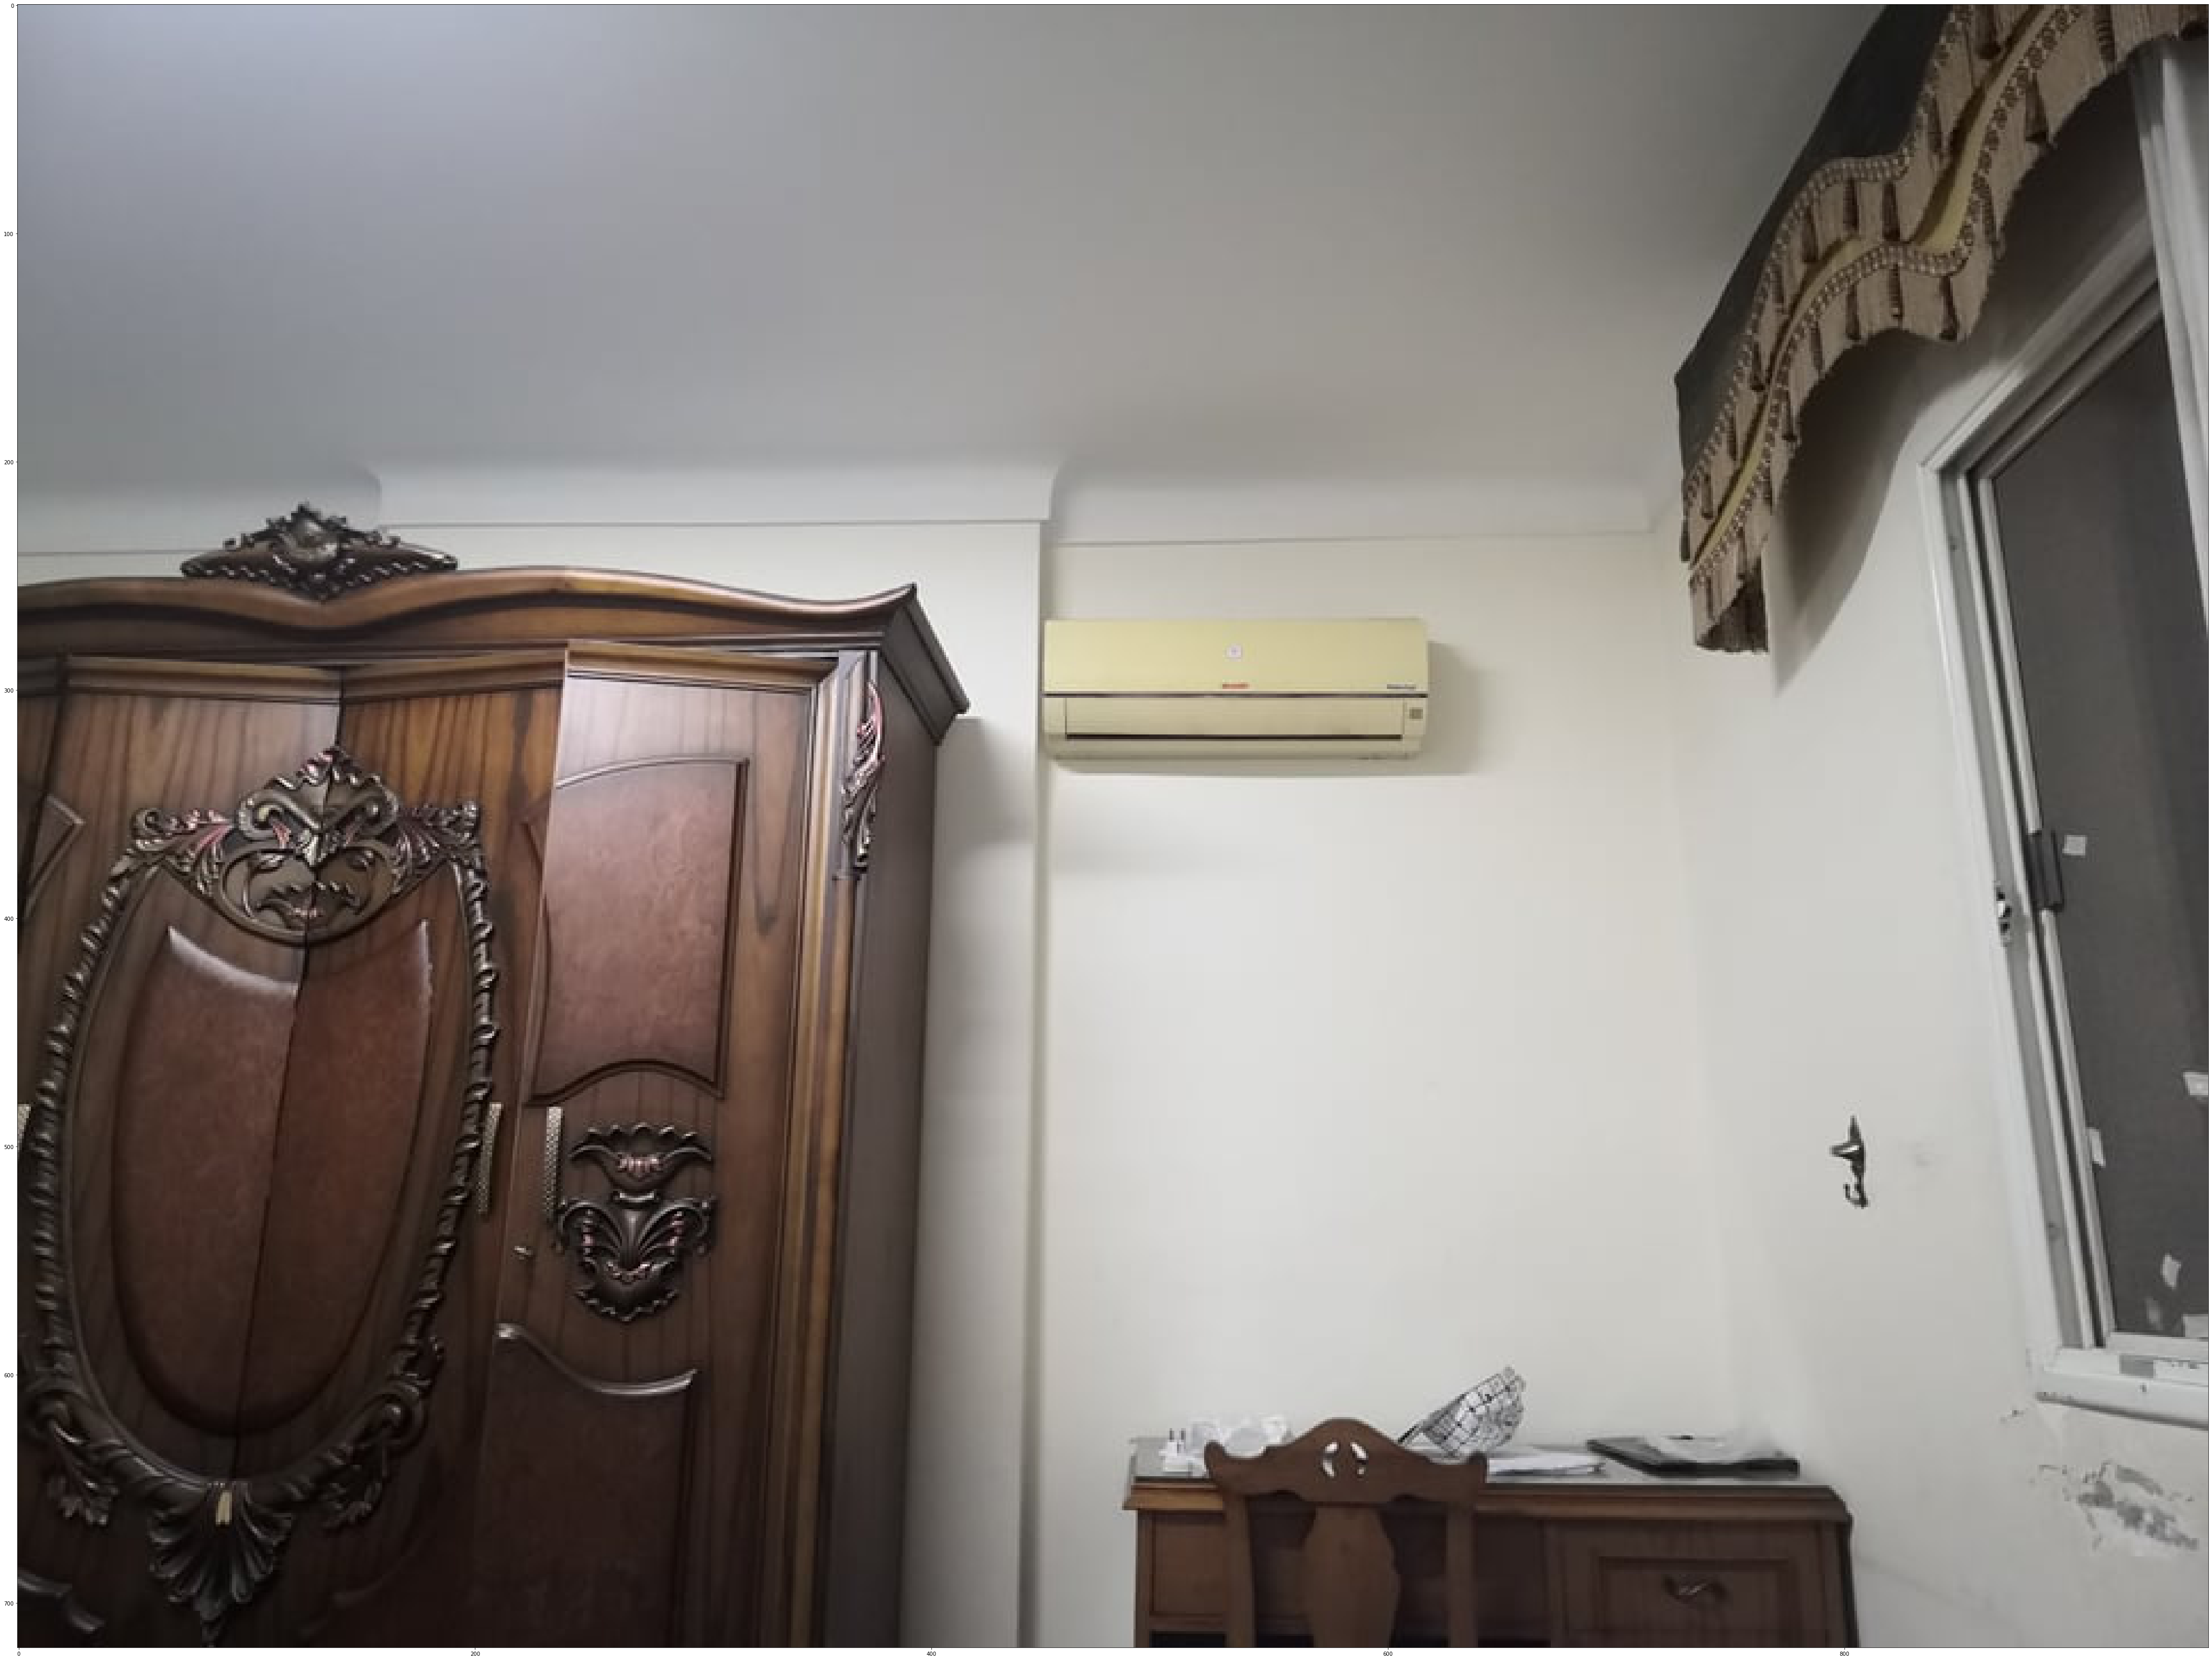

In [14]:
def show(img, size=75):
    print(img.shape)
    plt.figure(figsize = (size,size))
    
    if len(img.shape) == 2: # if grayscale, set cmap
        plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    else: # if 3 channels, change from BGR to RGB
        plt.imshow(img[...,::-1])
        
    plt.show()

img = cv2.imread("./image_mosaics_1.jpg")
show(img)

## Finding The KeyPoints Using SIFT

In [31]:
def get_keypoints(img):
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(img,None)
    img_keypoints=cv2.drawKeypoints(img,kp,img)
    show(img_keypoints, 8)
    return kp, des

## Finding Correspondence

In [48]:
def get_correspondences(imgA, imgB):
    kp1, des1 = get_keypoints(imgA)
    kp2, des2 = get_keypoints(imgB)

    
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2,k=2)
    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.2*n.distance:
            good.append([m])
            
            
    # cv.drawMatchesKnn expects list of lists as matches.
    img3 = cv2.drawMatchesKnn(imgA,kp1,imgB,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    show(img3)
    
    return good

(720, 960, 3)


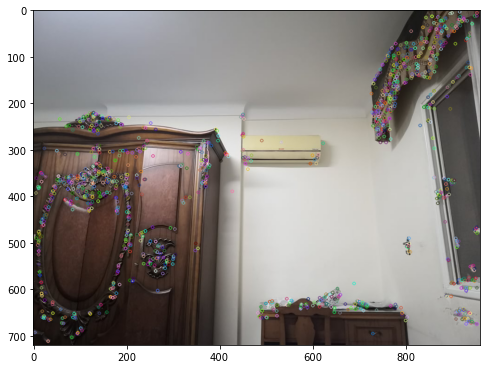

(720, 960, 3)


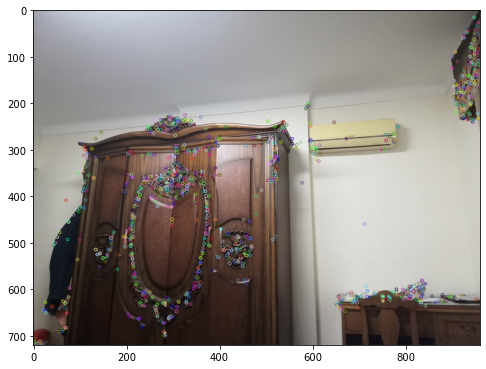

(720, 1920, 3)


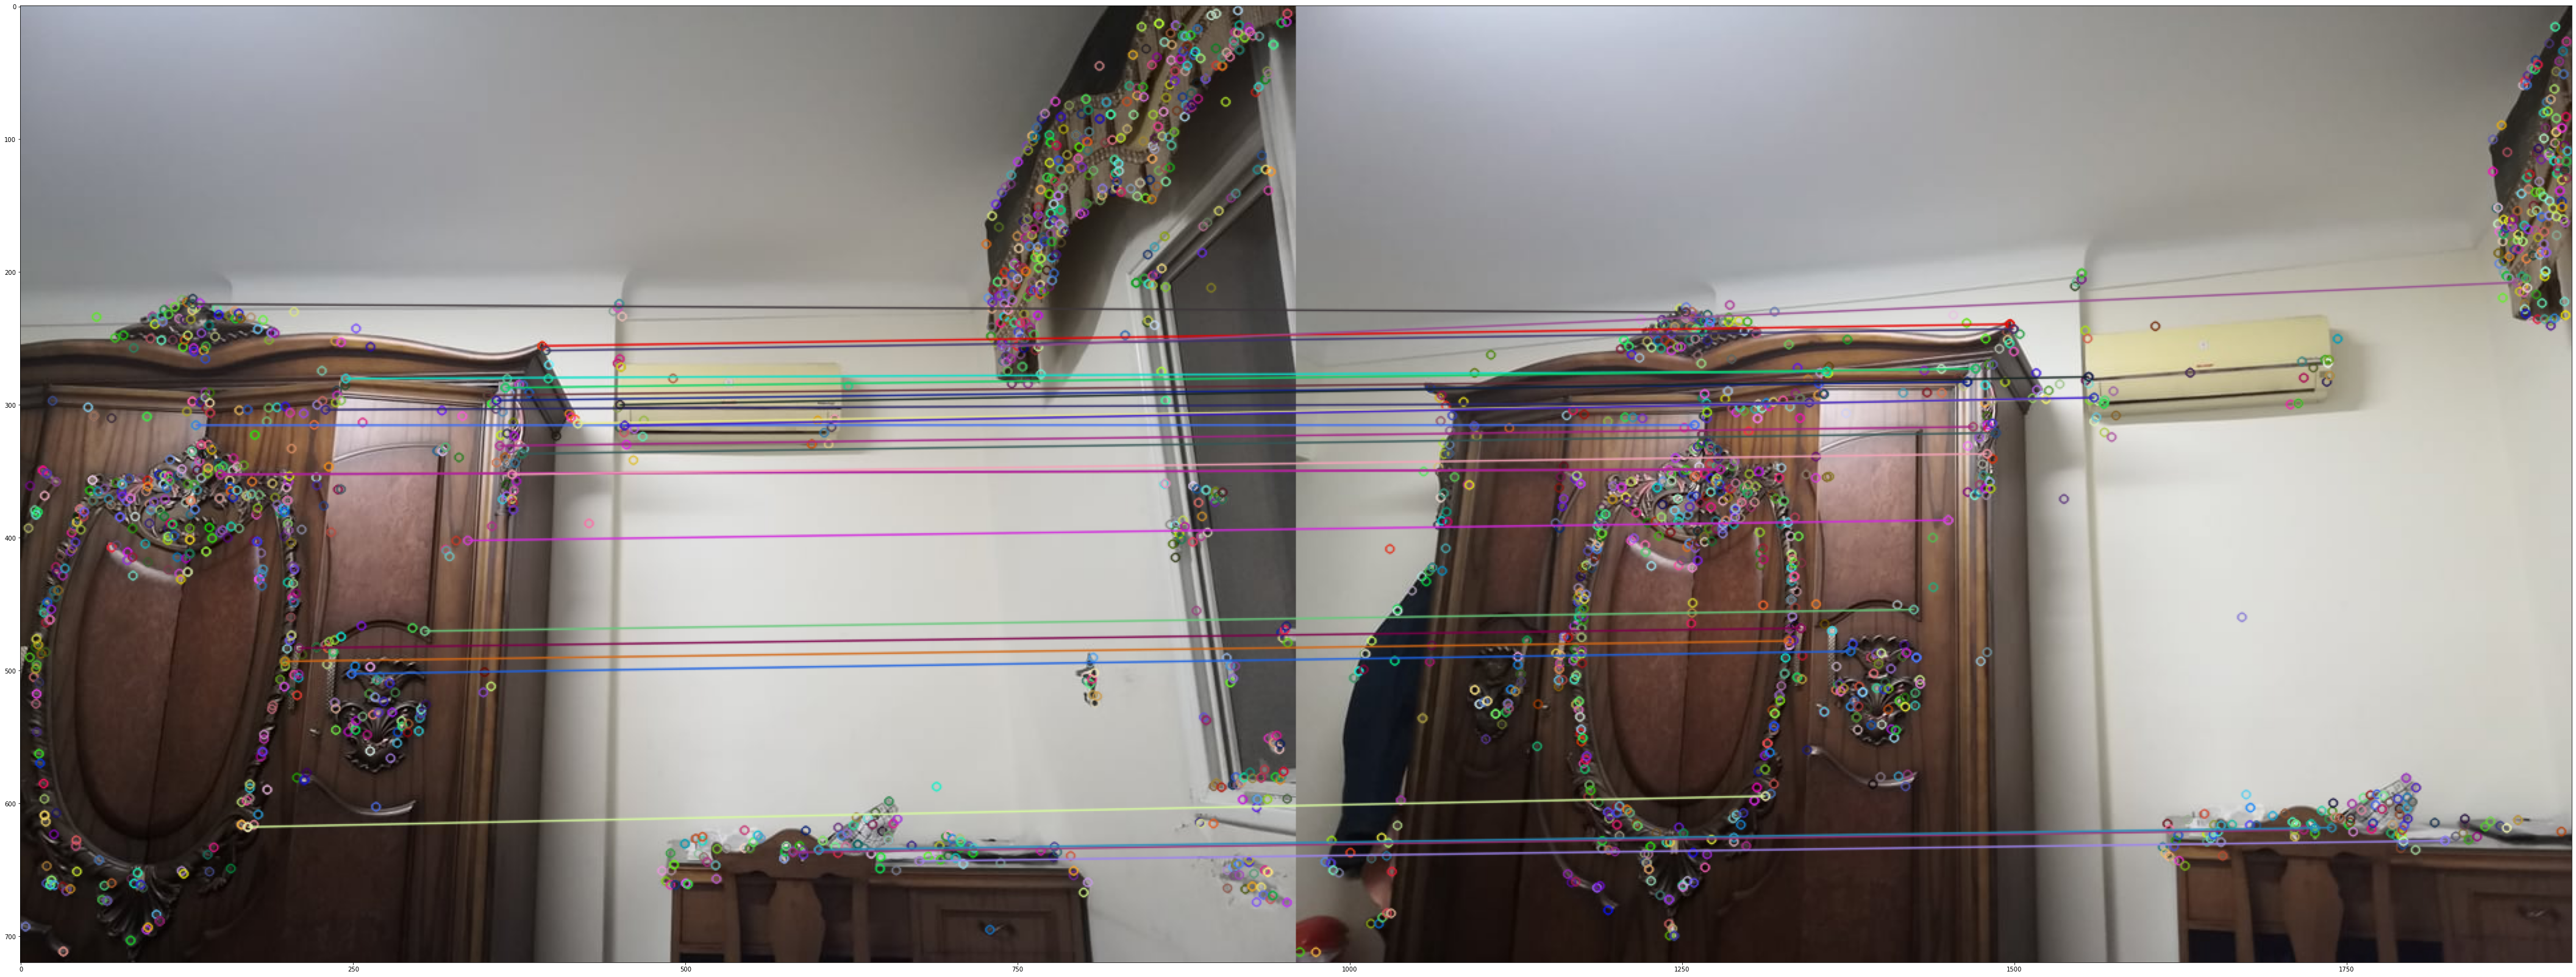

[[<DMatch 0000023C3A2A5E10>],
 [<DMatch 0000023C3A2A5170>],
 [<DMatch 0000023C38B3D130>],
 [<DMatch 0000023C38B3D6D0>],
 [<DMatch 0000023C3A390030>],
 [<DMatch 0000023C3A32FBF0>],
 [<DMatch 0000023C3A32FBD0>],
 [<DMatch 0000023C3A43B490>],
 [<DMatch 0000023C3A43BBF0>],
 [<DMatch 0000023C3A43B8F0>],
 [<DMatch 0000023C387B9AB0>],
 [<DMatch 0000023C387B9170>],
 [<DMatch 0000023C387B9D70>],
 [<DMatch 0000023C387B90D0>],
 [<DMatch 0000023C387B96F0>],
 [<DMatch 0000023C3BE064B0>],
 [<DMatch 0000023C3BE06A90>],
 [<DMatch 0000023C3BE062D0>],
 [<DMatch 0000023C3BE06AB0>],
 [<DMatch 0000023C3BE062F0>],
 [<DMatch 0000023C3BE06BB0>],
 [<DMatch 0000023C3A35FD90>],
 [<DMatch 0000023C3A35F830>],
 [<DMatch 0000023C3BDA44D0>],
 [<DMatch 0000023C3A445150>],
 [<DMatch 0000023C38A994B0>],
 [<DMatch 0000023C399B0270>]]

In [49]:
imgA = cv2.imread("./image_mosaics_1.jpg")
imgB = cv2.imread("./image_mosaics_2.jpg")


get_correspondences(imgA, imgB)
